In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Projects/Project Bi/data/hellowork_400pages.csv")
df

,titre,entreprise,localisation,salaire,date_publication,description
0,Boulanger H/F,Boulangerie Ange,Jaux - 60,1 800 - 2 000 € / mois,2025-12-14 00:35:44.864964,"Boulanger H/F à Jaux - 60, chez Boulangerie A..."
1,Assistant Ménager Ossé H/F,Maison et Services,Châteaugiron - 35,11,2025-12-14 00:35:44.866136,Assistant Ménager Ossé H/F à Châteaugiron - 35...
2,Directeur Hypermarché H/F,Auchan Retail France,Lyon - 69,75 400 - 85 800 € / an,2025-12-14 00:35:44.866489,"Directeur Hypermarché H/F à Lyon - 69, chez Au..."
3,Verkäufer - In M - W - D - In Voll - Teilzeit H/F,Jacadi,Allemagne,24 000 - 28 000 € / an,2025-12-14 00:35:44.866886,Verkäufer - In M - W - D - In Voll - Teilzeit ...
4,Responsable Animations Pièces & Services H/F,Emil Frey France,Grenoble - 38,45 000 - 50 000 € / an,2025-12-14 00:35:44.869001,Responsable Animations Pièces & Services H/F à...
...,...,...,...,...,...,...
3743,Collaborateur Comptable Confirmé H/F,CERFRANCE Mayenne/Sarthe,Le Grand-Lucé - 72,28 000 - 35 000 € / an,2025-12-14 01:05:25.485211,Collaborateur Comptable Confirmé H/F à Le Gran...
3744,Second de Cuisine H/F,Vitalrest,Paris 18e - 75,2 352 € / mois,2025-12-14 01:05:25.485556,"Second de Cuisine H/F à Paris 18e - 75, chez V..."
3745,Auxiliaire de Vie H/F,ADHAP,Clermont-Ferrand - 63,12 - 12,2025-12-14 01:05:25.486248,"Auxiliaire de Vie H/F à Clermont-Ferrand - 63,..."
3746,Commercial Terrain Btob - Bâtiment H/F,Dorthz,Loire-Atlantique - 44,25 000 - 50 000 € / an,2025-12-14 01:05:25.486972,Commercial Terrain Btob - Bâtiment H/F à Loire...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titre             3748 non-null   object
 1   entreprise        3748 non-null   object
 2   localisation      3748 non-null   object
 3   salaire           3748 non-null   object
 4   date_publication  3748 non-null   object
 5   description       3748 non-null   object
dtypes: object(6)
memory usage: 175.8+ KB


In [4]:
df=df.dropna(subset=['salaire'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titre             3748 non-null   object
 1   entreprise        3748 non-null   object
 2   localisation      3748 non-null   object
 3   salaire           3748 non-null   object
 4   date_publication  3748 non-null   object
 5   description       3748 non-null   object
dtypes: object(6)
memory usage: 175.8+ KB


In [5]:
for col in df.columns:
    print("="*80)
    print(f"📌 Colonne : {col}")
    print(f"Type : {df[col].dtype}")
    print(f"Valeurs uniques : {df[col].nunique()}")
    print(f"Valeurs manquantes : {df[col].isna().sum()} ({df[col].isna().mean()*100:.2f}%)")
    print("-"*80)

    value_counts = df[col].value_counts(dropna=False)
    percentages = (value_counts / len(df)) * 100

    summary = pd.DataFrame({
    "Valeur": value_counts.index.astype(str),
    "Fréquence": value_counts.values,
    "Pourcentage (%)": percentages.round(2)
    })

    print(summary.to_string(index=False))
    print("\n")

📌 Colonne : titre
Type : object
Valeurs uniques : 22
Valeurs manquantes : 0 (0.00%)
--------------------------------------------------------------------------------
                                                     Valeur  Fréquence  Pourcentage (%)
          Verkäufer - In M - W - D - In Voll - Teilzeit H/F        278             7.42
                                      Auxiliaire de Vie H/F        264             7.04
                                      Second de Cuisine H/F        264             7.04
                    Chef de Mission Expertise Comptable H/F        258             6.88
                       Responsable Back-Office & Supply H/F        258             6.88
               Responsable Animations Pièces & Services H/F        258             6.88
                     Commercial Terrain Btob - Bâtiment H/F        142             3.79
                       Collaborateur Comptable Confirmé H/F        142             3.79
                                    Conduct

In [6]:
def extraire_type_contrat(description):
    """Extraire le type de contrat depuis la description"""
    if pd.isna(description):
        return None

    description_lower = description.lower()

    # Recherche des types de contrat
    if 'cdi' in description_lower:
        return 'CDI'
    elif 'cdd' in description_lower:
        return 'CDD'
    elif 'intérim' in description_lower or 'interim' in description_lower:
        return 'Intérim'
    elif 'stage' in description_lower:
        return 'Stage'
    elif 'alternance' in description_lower:
        return 'Alternance'
    elif 'apprentissage' in description_lower:
        return 'Apprentissage'
    else:
        return 'Non spécifié'

In [7]:
def extraire_temps_travail(description):
    """Extraire le temps de travail depuis la description"""
    if pd.isna(description):
        return None

    description_lower = description.lower()

    # Recherche du temps de travail
    if 'temps plein' in description_lower:
        return 'Temps plein'
    elif 'temps partiel' in description_lower:
        return 'Temps partiel'
    elif 'plein temps' in description_lower:
        return 'Temps plein'
    elif 'partiel' in description_lower:
        return 'Temps partiel'
    elif 'mi-temps' in description_lower:
        return 'Mi-temps'
    else:
        return 'Non spécifié'

In [8]:
# 3. Appliquer les transformations
df['type_contrat'] = df['description'].apply(extraire_type_contrat)
df['temps_travail'] = df['description'].apply(extraire_temps_travail)

In [9]:
print("\nVérification des transformations :")
print(f"Types de contrat uniques : {df['type_contrat'].unique()}")
print(f"Temps de travail uniques : {df['temps_travail'].unique()}")


Vérification des transformations :
Types de contrat uniques : ['CDI']
Temps de travail uniques : ['Temps plein' 'Temps partiel']


In [10]:
df

,titre,entreprise,localisation,salaire,date_publication,description,type_contrat,temps_travail
0,Boulanger H/F,Boulangerie Ange,Jaux - 60,1 800 - 2 000 € / mois,2025-12-14 00:35:44.864964,"Boulanger H/F à Jaux - 60, chez Boulangerie A...",CDI,Temps plein
1,Assistant Ménager Ossé H/F,Maison et Services,Châteaugiron - 35,11,2025-12-14 00:35:44.866136,Assistant Ménager Ossé H/F à Châteaugiron - 35...,CDI,Temps partiel
2,Directeur Hypermarché H/F,Auchan Retail France,Lyon - 69,75 400 - 85 800 € / an,2025-12-14 00:35:44.866489,"Directeur Hypermarché H/F à Lyon - 69, chez Au...",CDI,Temps plein
3,Verkäufer - In M - W - D - In Voll - Teilzeit H/F,Jacadi,Allemagne,24 000 - 28 000 € / an,2025-12-14 00:35:44.866886,Verkäufer - In M - W - D - In Voll - Teilzeit ...,CDI,Temps partiel
4,Responsable Animations Pièces & Services H/F,Emil Frey France,Grenoble - 38,45 000 - 50 000 € / an,2025-12-14 00:35:44.869001,Responsable Animations Pièces & Services H/F à...,CDI,Temps plein
...,...,...,...,...,...,...,...,...
3743,Collaborateur Comptable Confirmé H/F,CERFRANCE Mayenne/Sarthe,Le Grand-Lucé - 72,28 000 - 35 000 € / an,2025-12-14 01:05:25.485211,Collaborateur Comptable Confirmé H/F à Le Gran...,CDI,Temps plein
3744,Second de Cuisine H/F,Vitalrest,Paris 18e - 75,2 352 € / mois,2025-12-14 01:05:25.485556,"Second de Cuisine H/F à Paris 18e - 75, chez V...",CDI,Temps plein
3745,Auxiliaire de Vie H/F,ADHAP,Clermont-Ferrand - 63,12 - 12,2025-12-14 01:05:25.486248,"Auxiliaire de Vie H/F à Clermont-Ferrand - 63,...",CDI,Temps partiel
3746,Commercial Terrain Btob - Bâtiment H/F,Dorthz,Loire-Atlantique - 44,25 000 - 50 000 € / an,2025-12-14 01:05:25.486972,Commercial Terrain Btob - Bâtiment H/F à Loire...,CDI,Temps plein


In [11]:
df = df.drop(columns='date_publication')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   titre          3748 non-null   object
 1   entreprise     3748 non-null   object
 2   localisation   3748 non-null   object
 3   salaire        3748 non-null   object
 4   description    3748 non-null   object
 5   type_contrat   3748 non-null   object
 6   temps_travail  3748 non-null   object
dtypes: object(7)
memory usage: 205.1+ KB


In [12]:
import re


def salaire_to_annuel(s):
    if pd.isna(s):
        return np.nan

    s = s.lower().replace("€", "").replace(" ", "")

    # Extraire tous les nombres
    numbers = re.findall(r"\d+", s)
    if not numbers:
        return np.nan

    numbers = list(map(float, numbers))
    salaire = np.mean(numbers)  # moyenne si fourchette

    # Conversion en annuel
    if "mois" in s:
        salaire *= 12
    elif "an" in s or "annuel" in s:
        salaire = salaire
    else:
        # si non précisé → on suppose annuel
        salaire = salaire

    return float(salaire)

In [13]:
df["salaire_annuel"] = df["salaire"].apply(salaire_to_annuel)
df['salaire_annuel'].value_counts()


salaire_annuel
13.00      420
17.00      264
23.75      258
22.50      258
11.00      258
23.25      258
12.00      142
18.75      142
1515.00    142
485.50     142
164.50     142
15.75      142
2124.00    142
2655.00    142
2409.00    136
340.00     136
13.75      136
4812.00    122
2112.00    122
109.00     122
915.00     122
Name: count, dtype: int64

In [14]:
df = df.dropna(subset=["salaire_annuel"])
df['salaire'].value_counts()

salaire
24 000 - 28 000 € / an    278
32 000 - 36 000 € / an    264
40 000 - 50 000 € / an    258
45 000 - 50 000 € / an    258
38 000 - 55 000 € / an    258
11                        258
25 000 - 50 000 € / an    142
12 - 12                   142
2 500 - 3 000 € / mois    142
26 000 € / an             142
24 947 € / an             142
25 500 - 33 100 € / an    142
28 000 - 35 000 € / an    142
2 352 € / mois            142
1 835 - 2 047 € / mois    142
1 800 - 2 000 € / mois    136
75 400 - 85 800 € / an    136
24 000 - 31 000 € / an    136
2 800 € / mois            122
2 200 - 2 500 € / mois    122
2 216                     122
2 300 - 3 000 € / mois    122
Name: count, dtype: int64

In [15]:
median_salary = df["salaire_annuel"].median()
df["categorie_salaire"] = df["salaire_annuel"].apply(
    lambda x: "Bas salaire" if x < median_salary else "Haut salaire"
)


In [16]:
df

,titre,entreprise,localisation,salaire,description,type_contrat,temps_travail,salaire_annuel,categorie_salaire
0,Boulanger H/F,Boulangerie Ange,Jaux - 60,1 800 - 2 000 € / mois,"Boulanger H/F à Jaux - 60, chez Boulangerie A...",CDI,Temps plein,2409.00,Haut salaire
1,Assistant Ménager Ossé H/F,Maison et Services,Châteaugiron - 35,11,Assistant Ménager Ossé H/F à Châteaugiron - 35...,CDI,Temps partiel,11.00,Bas salaire
2,Directeur Hypermarché H/F,Auchan Retail France,Lyon - 69,75 400 - 85 800 € / an,"Directeur Hypermarché H/F à Lyon - 69, chez Au...",CDI,Temps plein,340.00,Haut salaire
3,Verkäufer - In M - W - D - In Voll - Teilzeit H/F,Jacadi,Allemagne,24 000 - 28 000 € / an,Verkäufer - In M - W - D - In Voll - Teilzeit ...,CDI,Temps partiel,13.00,Bas salaire
4,Responsable Animations Pièces & Services H/F,Emil Frey France,Grenoble - 38,45 000 - 50 000 € / an,Responsable Animations Pièces & Services H/F à...,CDI,Temps plein,23.75,Haut salaire
...,...,...,...,...,...,...,...,...,...
3743,Collaborateur Comptable Confirmé H/F,CERFRANCE Mayenne/Sarthe,Le Grand-Lucé - 72,28 000 - 35 000 € / an,Collaborateur Comptable Confirmé H/F à Le Gran...,CDI,Temps plein,15.75,Bas salaire
3744,Second de Cuisine H/F,Vitalrest,Paris 18e - 75,2 352 € / mois,"Second de Cuisine H/F à Paris 18e - 75, chez V...",CDI,Temps plein,2124.00,Haut salaire
3745,Auxiliaire de Vie H/F,ADHAP,Clermont-Ferrand - 63,12 - 12,"Auxiliaire de Vie H/F à Clermont-Ferrand - 63,...",CDI,Temps partiel,12.00,Bas salaire
3746,Commercial Terrain Btob - Bâtiment H/F,Dorthz,Loire-Atlantique - 44,25 000 - 50 000 € / an,Commercial Terrain Btob - Bâtiment H/F à Loire...,CDI,Temps plein,18.75,Bas salaire


In [17]:
df = df.drop(columns='description')
df = df.drop(columns='type_contrat')
df = df.drop(columns='salaire')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titre              3748 non-null   object 
 1   entreprise         3748 non-null   object 
 2   localisation       3748 non-null   object 
 3   temps_travail      3748 non-null   object 
 4   salaire_annuel     3748 non-null   float64
 5   categorie_salaire  3748 non-null   object 
dtypes: float64(1), object(5)
memory usage: 175.8+ KB


In [18]:
df

,titre,entreprise,localisation,temps_travail,salaire_annuel,categorie_salaire
0,Boulanger H/F,Boulangerie Ange,Jaux - 60,Temps plein,2409.00,Haut salaire
1,Assistant Ménager Ossé H/F,Maison et Services,Châteaugiron - 35,Temps partiel,11.00,Bas salaire
2,Directeur Hypermarché H/F,Auchan Retail France,Lyon - 69,Temps plein,340.00,Haut salaire
3,Verkäufer - In M - W - D - In Voll - Teilzeit H/F,Jacadi,Allemagne,Temps partiel,13.00,Bas salaire
4,Responsable Animations Pièces & Services H/F,Emil Frey France,Grenoble - 38,Temps plein,23.75,Haut salaire
...,...,...,...,...,...,...
3743,Collaborateur Comptable Confirmé H/F,CERFRANCE Mayenne/Sarthe,Le Grand-Lucé - 72,Temps plein,15.75,Bas salaire
3744,Second de Cuisine H/F,Vitalrest,Paris 18e - 75,Temps plein,2124.00,Haut salaire
3745,Auxiliaire de Vie H/F,ADHAP,Clermont-Ferrand - 63,Temps partiel,12.00,Bas salaire
3746,Commercial Terrain Btob - Bâtiment H/F,Dorthz,Loire-Atlantique - 44,Temps plein,18.75,Bas salaire


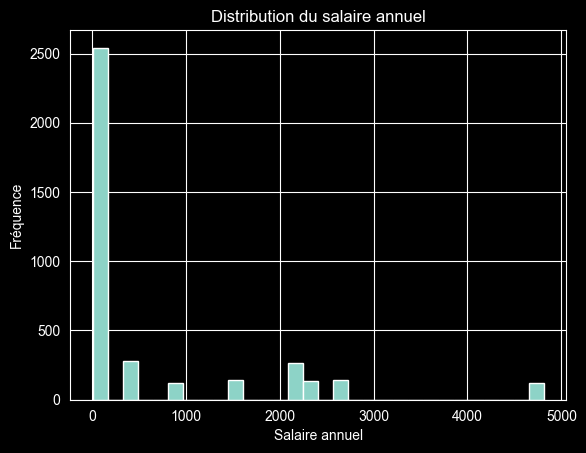

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["salaire_annuel"].dropna(), bins=30)
plt.xlabel("Salaire annuel")
plt.ylabel("Fréquence")
plt.title("Distribution du salaire annuel")
plt.show()


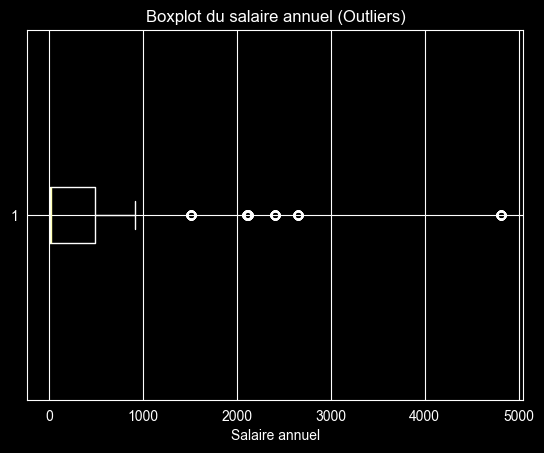

In [20]:
plt.figure()
plt.boxplot(df["salaire_annuel"].dropna(), vert=False)
plt.xlabel("Salaire annuel")
plt.title("Boxplot du salaire annuel (Outliers)")
plt.show()


In [21]:
Q1 = df["salaire_annuel"].quantile(0.25)
Q3 = df["salaire_annuel"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df["salaire_annuel"] < lower_bound) |
    (df["salaire_annuel"] > upper_bound)
]

print("Nombre d'outliers :", outliers.shape[0])


Nombre d'outliers : 806


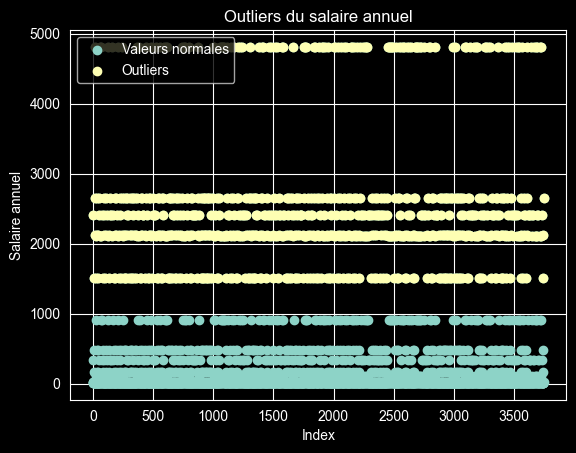

In [22]:
plt.figure()
plt.scatter(
    df.index,
    df["salaire_annuel"],
    label="Valeurs normales"
)

plt.scatter(
    outliers.index,
    outliers["salaire_annuel"],
    label="Outliers"
)

plt.xlabel("Index")
plt.ylabel("Salaire annuel")
plt.title("Outliers du salaire annuel")
plt.legend()
plt.show()


In [23]:
df["categorie_salaire"] = df["categorie_salaire"].map({
    "Bas salaire": 0,
    "Haut salaire": 1
})

df["temps_travail"] = df["temps_travail"].map({
    "Temps partiel": 0,
    "Temps plein": 1
})


In [24]:
df

,titre,entreprise,localisation,temps_travail,salaire_annuel,categorie_salaire
0,Boulanger H/F,Boulangerie Ange,Jaux - 60,1,2409.00,1
1,Assistant Ménager Ossé H/F,Maison et Services,Châteaugiron - 35,0,11.00,0
2,Directeur Hypermarché H/F,Auchan Retail France,Lyon - 69,1,340.00,1
3,Verkäufer - In M - W - D - In Voll - Teilzeit H/F,Jacadi,Allemagne,0,13.00,0
4,Responsable Animations Pièces & Services H/F,Emil Frey France,Grenoble - 38,1,23.75,1
...,...,...,...,...,...,...
3743,Collaborateur Comptable Confirmé H/F,CERFRANCE Mayenne/Sarthe,Le Grand-Lucé - 72,1,15.75,0
3744,Second de Cuisine H/F,Vitalrest,Paris 18e - 75,1,2124.00,1
3745,Auxiliaire de Vie H/F,ADHAP,Clermont-Ferrand - 63,0,12.00,0
3746,Commercial Terrain Btob - Bâtiment H/F,Dorthz,Loire-Atlantique - 44,1,18.75,0


In [27]:
binary_features = ["categorie_salaire", "temps_travail"]
numeric_features = ["salaire_annuel"]
categorical_features = ["titre", "entreprise", "localisation"]

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(
            drop="first",
            handle_unknown="ignore",
            sparse_output=False   # ⚠️ TRÈS IMPORTANT
        ), categorical_features),
        ("bin", "passthrough", binary_features)
    ],
    remainder="drop"
)
